In [1]:
import numpy as np
import pandas as pd

FEATURES_PATH = "../data/processed/features_scaled.npy"
META_PATH = "../data/processed/metadata.csv"

X_scaled = np.load(FEATURES_PATH)
metadata = pd.read_csv(META_PATH)

X_scaled.shape, metadata.shape

((170653, 9), (170653, 3))

In [2]:
from sklearn.cluster import KMeans

inertia = []

K_RANGE = range(2, 11)

for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


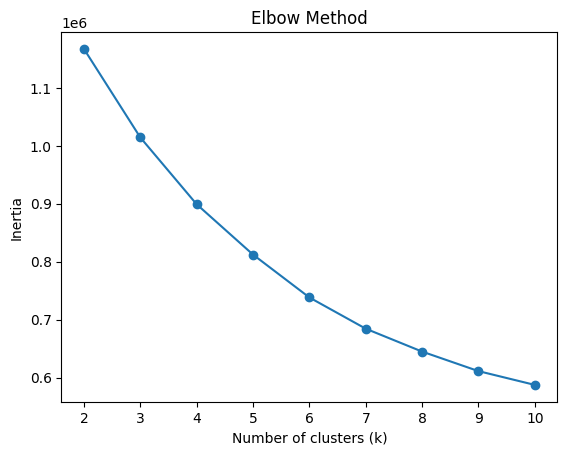

In [3]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(K_RANGE, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [4]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np

X_scaled = np.load("../data/processed/features_scaled.npy")

X_sample = X_scaled[np.random.choice(X_scaled.shape[0], 10000, replace=False)]

silhouette_scores = []
K_RANGE = range(2, 11)

for k in K_RANGE:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_sample)
    score = silhouette_score(X_sample, labels)
    silhouette_scores.append(score)


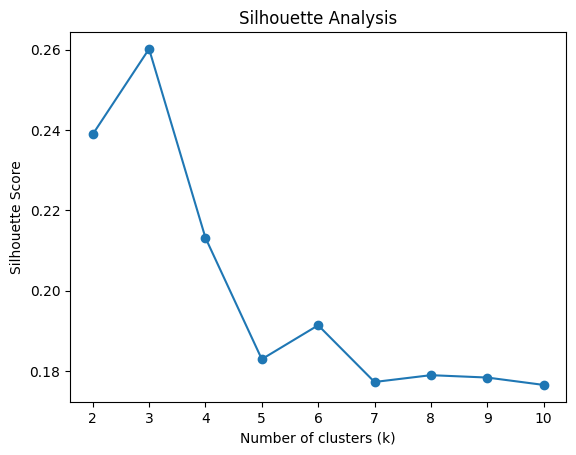

In [5]:
plt.figure()
plt.plot(K_RANGE, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


In [6]:
K_FINAL = 4

kmeans = KMeans(
    n_clusters=K_FINAL,
    random_state=42,
    n_init=10
)

cluster_labels = kmeans.fit_predict(X_scaled)


In [7]:
metadata["cluster"] = cluster_labels

CLUSTERED_META_PATH = "../data/processed/metadata_with_clusters.csv"
metadata.to_csv(CLUSTERED_META_PATH, index=False)


In [8]:
import pickle

MODEL_PATH = "../data/processed/kmeans_model.pkl"

with open(MODEL_PATH, "wb") as f:
    pickle.dump(kmeans, f)
